### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

I should have read this first https://engineeringfordatascience.com/posts/visualising_asset_price_correlations/

Note: This is best used on assets thats are quite differnt (not highly correlated) and skip the section that removed not-highly-correlated-assets

In [1]:
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,VWO,mchi,GLD,XEC.to,AMZN,AMD,qqq,MSFT,TSLA,EFG,cqqq,AAPL,SPY
Date,,,,,,,,,,,,,
2016-01-04,25.168888,37.514645,102.889999,17.308741,31.849501,2.77,102.970390,48.698887,14.894000,58.163109,33.105667,23.946917,174.583984
2016-01-05,25.224327,37.479813,103.180000,17.433565,31.689501,2.75,102.791702,48.921051,14.895333,58.031082,33.372959,23.346828,174.879257


<AxesSubplot:xlabel='Date'>

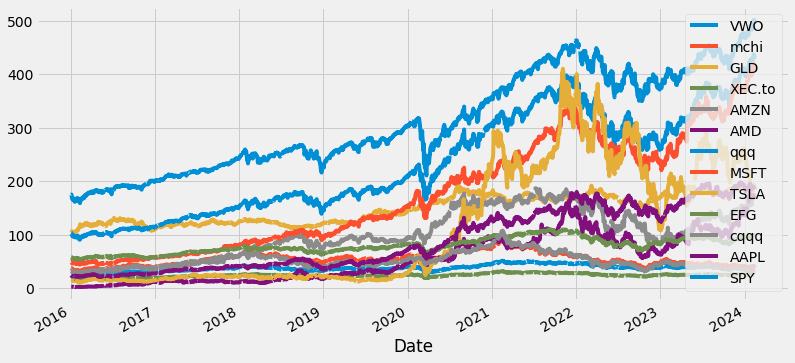

In [2]:
USE_LOG_RETURN = False
# // should add the ETFs: TIT and TEC 


# // Demo - Hand select random stocks. Plot titles will be inaccuratly title "{index_1}...."
ls = ['SPY', 'AAPL', 'AMZN', 'AMD', 'MSFT', 'GLD', 'TSLA', 'XEC.to', 'VWO', 'EFG', 'qqq', 'cqqq', 'mchi']

# // HMMJ.to a weed ETF
# ls = ['HMMJ.to','ogi','hexo','cweb','smg','tlry','acb','cron','weed.TO'] # ,'weed'

# // XEG.to a Canadian Oil and Gas ETF, which I've traded a lot
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to','PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted

# // FNGU a 3x Tech ETN 
# ls = ['FNGU','AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR'] # FNGU ETF. MSFT has a very high corr with FNGU
# ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ETF = ls[0]
ls  = list(set(ls))



data = {} 

for i in ls:
  arry = yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

stocks.head(2)
stocks.plot(grid = True)

In [3]:
print(f'How many are NA? {np.sum(stocks.isna())}')
print(f'shape of stocks before dropping NA: {stocks.shape}')
stocks.dropna(inplace=True)
print(f'shape of stocks after dropping NA: {stocks.shape}')
stocks.head(3)

How many are NA? VWO       37
mchi      37
GLD       37
XEC.to    42
AMZN      37
AMD       37
qqq       37
MSFT      37
TSLA      37
EFG       37
cqqq      37
AAPL      37
SPY       37
dtype: int64
shape of stocks before dropping NA: (2079, 13)
shape of stocks after dropping NA: (2000, 13)


,VWO,mchi,GLD,XEC.to,AMZN,AMD,qqq,MSFT,TSLA,EFG,cqqq,AAPL,SPY
Date,,,,,,,,,,,,,
2016-01-04,25.168888,37.514645,102.889999,17.308741,31.849501,2.77,102.970390,48.698887,14.894000,58.163109,33.105667,23.946917,174.583984
2016-01-05,25.224327,37.479813,103.180000,17.433565,31.689501,2.75,102.791702,48.921051,14.895333,58.031082,33.372959,23.346828,174.879257
2016-01-06,24.772903,36.852684,104.669998,17.250490,31.632500,2.51,101.804314,48.032375,14.602667,57.045265,32.991112,22.889933,172.673294


,VWO,mchi,GLD,XEC.to,AMZN,AMD,qqq,MSFT,TSLA,EFG,cqqq,AAPL,SPY
0,159.0,100.0,179.0,147.0,532.0,6238.0,417.0,831.0,1235.0,168.0,90.0,793.0,283.0


<AxesSubplot:>

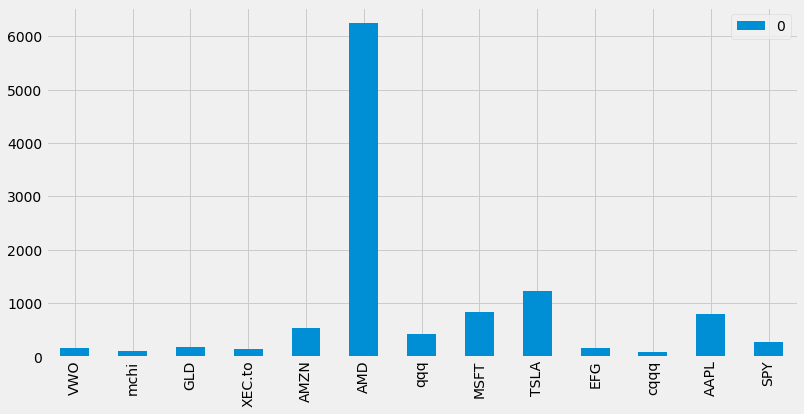

In [4]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round((roi + 1) * 100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

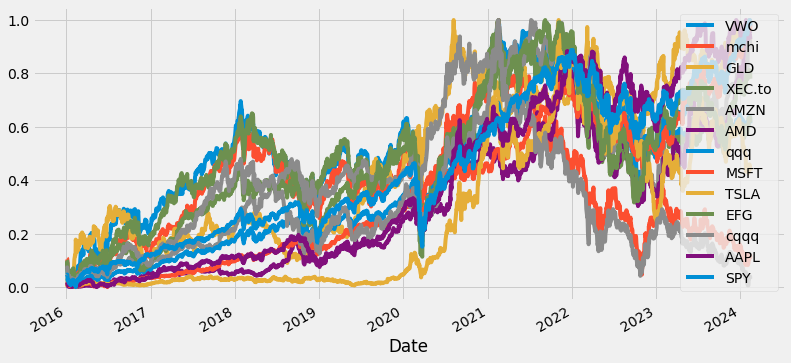

In [5]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = scale_data(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [6]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,VWO,mchi,GLD,XEC.to,AMZN,AMD,qqq,MSFT,TSLA,EFG,cqqq,AAPL,SPY
VWO,1.000000,0.632802,0.738285,0.978234,0.828353,0.778812,0.832797,0.776764,0.796776,0.935700,0.657456,0.755817,0.824144
mchi,1.632802,1.632802,0.957099,1.651908,1.353932,1.043687,1.152255,1.002512,1.108658,1.450365,1.639190,0.944911,1.094966
GLD,2.371087,1.851615,1.957099,2.362082,2.146222,1.900836,2.009922,1.866876,1.882304,2.279333,1.894866,1.801868,1.946408
XEC.to,3.349321,2.525290,2.667272,3.362082,2.968710,2.650721,2.823191,2.615884,2.623142,3.201604,2.577035,2.525199,2.743093
AMZN,4.177674,3.050868,3.459562,4.184570,3.968710,3.564646,3.753883,3.504862,3.459230,4.115568,3.112508,3.388050,3.640093
AMD,4.956486,3.315744,4.316712,4.934455,4.882635,4.564646,4.732358,4.482341,4.347718,5.016792,3.403654,4.350043,4.609778
qqq,5.789283,3.635202,5.174378,5.747724,5.813328,5.543121,5.732358,5.470240,5.237768,5.959459,3.744158,5.322326,5.601002
MSFT,6.566047,3.860949,6.038742,6.496732,6.702305,6.520600,6.720256,6.470240,6.121376,6.860280,3.993319,6.310186,6.590020
TSLA,7.362823,4.172831,6.812388,7.237570,7.538393,7.409088,7.610307,7.353847,7.121376,7.699321,4.369572,7.198324,7.469660
EFG,8.298522,4.687497,7.641356,8.159842,8.452357,8.310312,8.552974,8.254669,7.960417,8.699321,4.909257,8.078229,8.402921


In [7]:
stocks_norm_spearmanr_cumSum.sort_values(ETF, inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 2
# top_N = stocks.columns.shape[0]# // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns.to_list()
if ETF not in keepThese:
    keepThese.append(ETF)

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows. wont work well with code below (networkx)
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr = corr - np.eye(len(corr))

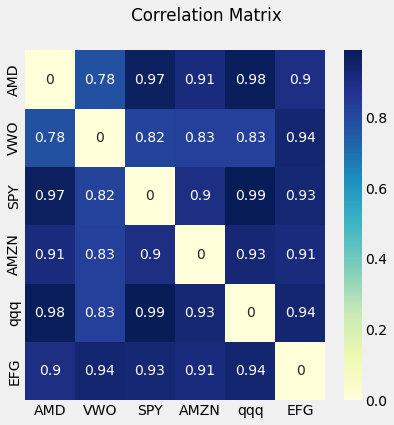

In [8]:
_=plt.subplots(figsize=(6, 6))
_=plt.suptitle("Correlation Matrix")
_=sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [9]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

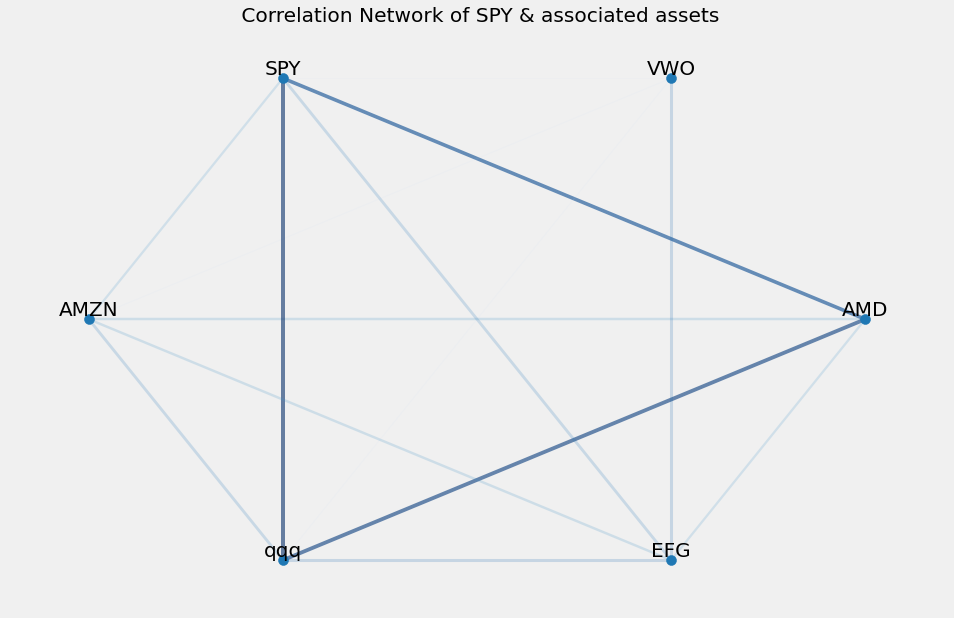

In [10]:
_=plt.figure(figsize=(15, 10))
_=plt.title(f" Correlation Network of {ETF} & associated assets")

G=nx.Graph()

for i in range(len(corr)):
  for j in range(len(corr)):
    
    if np.abs(corr.iloc[i,j]) > 0.25:
      G.add_edge(keepThese[i], keepThese[j], weight=corr.iloc[i,j])

# for i in G.nodes():
#     G.remove_edge(i, i)


# positions for all nodes
# pos=nx.fruchterman_reingold_layout(G) # Position nodes using Fruchterman-Reingold force-directed algorithm
# pos=nx.spring_layout(G) # *same as above
pos=nx.circular_layout(G) # Position nodes on a circle
#pos=nx.spectral_layout(G) # Position nodes using the eigenvectors of the graph Laplacian


# nodes
_=nx.draw_networkx_nodes(G,pos, node_size=100)


# Two types of egdes
# all = corr.values.flatten()
# thresh = np.average(all) + 2*np.std(all)
# elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= thresh]
# esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < thresh]
# _=nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                     width=1.5,alpha=0.25,edge_color='r') # ,style='dashed'
# _=nx.draw_networkx_edges(G,pos,edgelist=elarge,
#                     width=3,alpha=1,edge_color='g')
# ###############################################################################

# continuous width & alpha of edges 
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
weights_scaled = scale_data(weights)
width = np.array(weights_scaled) * 4

# force a right shew, scale and apply custom rounding
weights_shewed = np.log(weights_scaled+1, where=weights_scaled != 0)
alpha = scale_data(weights_shewed)
alpha = np.where(alpha < .35, .1, alpha)
alpha = np.where((alpha > .35) & (alpha < .85), .2, alpha)
alpha = np.where(alpha > .85, .6, alpha)


_=nx.draw_networkx_edges(G, pos, alpha=alpha, width=width,
  edge_color=weights_scaled, edge_cmap=plt.cm.Blues)
# ###############################################################################

# labels
_=nx.draw_networkx_labels(G,pos, font_size=20, verticalalignment='bottom')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [11]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

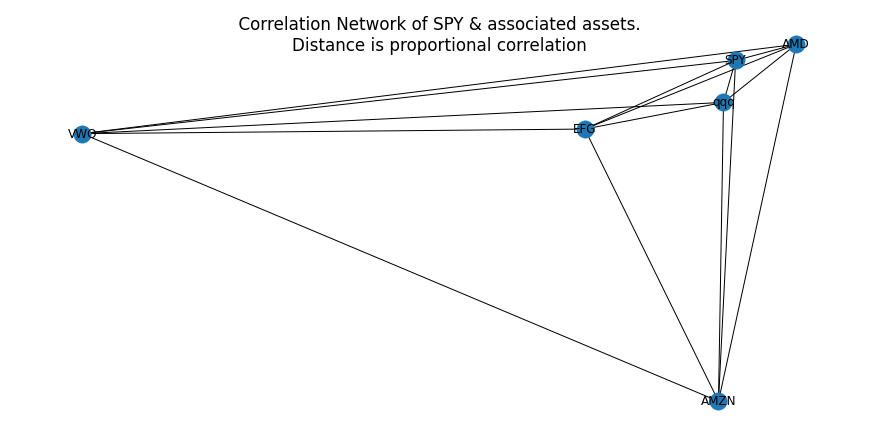

In [12]:
_=plt.suptitle(f" Correlation Network of {ETF} & associated assets. \nDistance is proportional correlation")
nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

# # corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

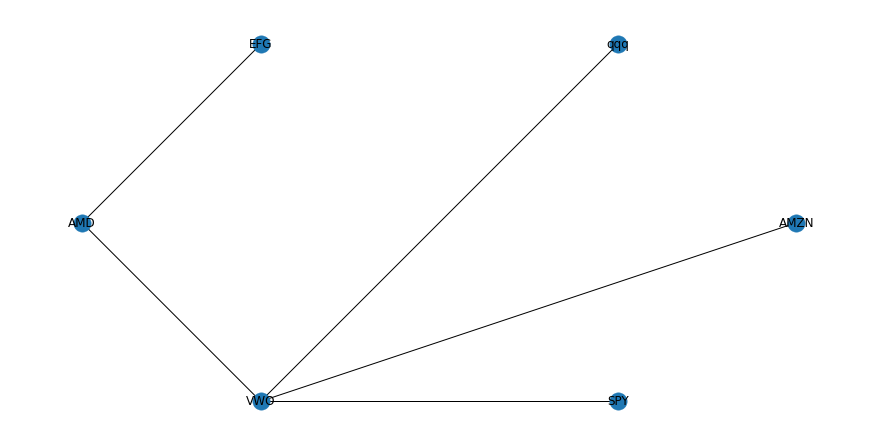

In [13]:
# # spanning tree 
span = nx.minimum_spanning_tree(graph)
nx.draw_shell(span, with_labels=True)